<a href="https://colab.research.google.com/github/aryan2107-cloud/100-Day-ML-Challenge-/blob/main/Day01(SyntheticData).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import numpy as np
import pandas as pd
from typing import Dict, List, Tuple, Optional, Union
from scipy import stats
from scipy.linalg import cholesky
import warnings
import matplotlib.pyplot as plt

In [2]:
import os

# Define your project structure
base_path = '/content/100-days-of-ml'

folders = [
    f'{base_path}/phase-1-data-foundations',
    f'{base_path}/phase-2-classical-ml',
    f'{base_path}/phase-3-deep-learning',
    f'{base_path}/phase-4-computer-vision',
    f'{base_path}/phase-5-nlp',
    f'{base_path}/phase-6-advanced',
]

# Create all folders
for folder in folders:
    os.makedirs(folder, exist_ok=True)

print('✓ Project structure created!')
!ls {base_path}

✓ Project structure created!
phase-1-data-foundations  phase-3-deep-learning    phase-5-nlp
phase-2-classical-ml	  phase-4-computer-vision  phase-6-advanced


In [3]:
from google.colab import drive
drive.mount('/content/drive')

# Now create folders in Drive (these persist forever)
os.makedirs('/content/drive/MyDrive/100-days-of-ml/day-01', exist_ok=True)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
import os

# Create the folder path
folder_path = '/content/drive/MyDrive/100-days-of-ml/phase-1-data-foundations/day-01-synthetic-data-generator'
os.makedirs(folder_path, exist_ok=True)

print(f'✓ Created: {folder_path}')

✓ Created: /content/drive/MyDrive/100-days-of-ml/phase-1-data-foundations/day-01-synthetic-data-generator


A simple generator

In [8]:
rng = np.random.default_rng(42)

data = rng.normal(loc=0, scale=1, size = 1000)

print(f"Mean: {data.mean():.3f}")
print(f"Std Dev: {data.std():.3f}")

"""
loc=0 → the center (mean) of the distribution
scale=1 → the spread (standard deviation)
size=1000 → how many numbers to generate
"""

Mean: -0.029
Std Dev: 0.989


Multiple features with Different distributions

In [ ]:
"""
Core RNG Control

default_rng() – Creates a new random number generator with the recommended, high-quality default algorithm (PCG64).

Generator – Object that produces random numbers using a specific bit generator.

Uniform & Basic Distributions:

random() – Samples floats uniformly from [0.0, 1.0).

integers() – Generates random integers from a specified range.

uniform() – Draws samples from a continuous uniform distribution over [low, high).

choice() – Randomly selects elements from a given array, with or without replacement.

Normal & Related Distributions:

normal() – Samples from a Gaussian (normal) distribution.

standard_normal() – Samples from a standard normal distribution (mean 0, std 1).

lognormal() – Draws samples from a log-normal distribution.

multivariate_normal() – Generates vectors from a multivariate normal distribution.

Discrete Probability Distributions:

binomial() – Samples from a binomial distribution.

poisson() – Generates samples from a Poisson distribution.

negative_binomial() – Draws samples from a negative binomial distribution.

geometric() – Returns the number of trials until first success.

hypergeometric() – Samples without replacement from a finite population.
"""

In [11]:
rng = np.random.default_rng(42)
n_samples = 1000

data = pd.DataFrame({
    'age': rng.normal(loc=35, scale=10, size=n_samples),
    'income': rng.lognormal(mean=10.5, sigma=0.5, size=n_samples),
    'tenure': rng.exponential(scale=3, size=n_samples),
    'purchases': rng.poisson(lam=5, size=n_samples),
    'region': rng.choice(['North', 'South', 'East', 'West'],
                         size=n_samples,
                         p=[0.3, 0.25, 0.25, 0.2])
})

print(data.head())
print(f"\n Shape: {data.shape}")

         age        income    tenure  purchases region
0  38.047171  35254.860208  0.093114         10  South
1  24.600159  25219.090137  0.933518          1   West
2  42.504512  29518.234413  1.716552          4   West
3  44.405647  49859.044282  1.331209          8  South
4  15.489648  36369.894804  1.586034          5   West

 Shape: (1000, 5)


Visualizing to understand the nature of data

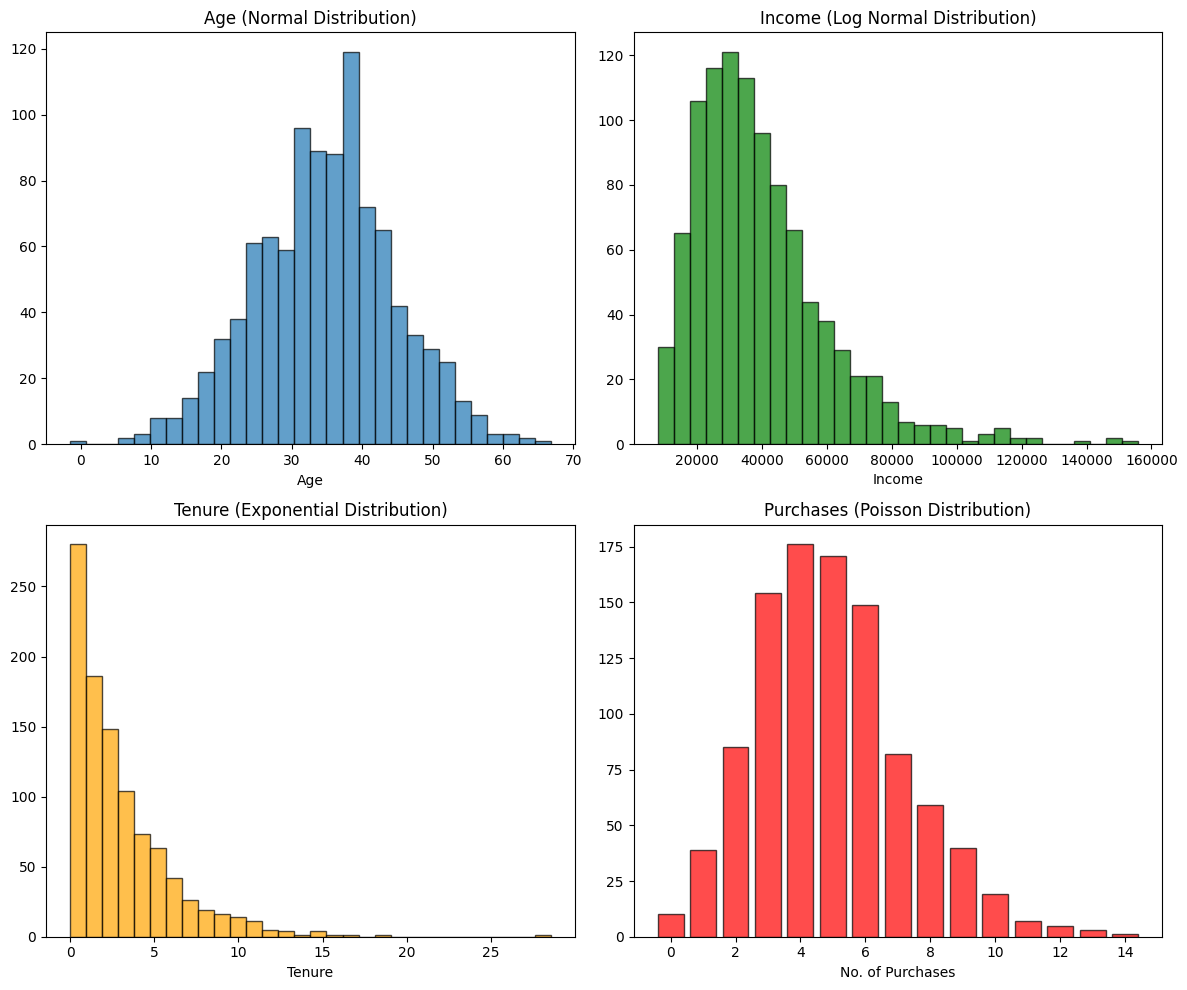

In [16]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Age - normal distribution
axes[0, 0].hist(data['age'], bins=30, edgecolor='black', alpha=0.7)
axes[0, 0].set_title("Age (Normal Distribution)")
axes[0, 0].set_xlabel("Age")

# Income - Log normal distribution
axes[0, 1].hist(data['income'], bins=30, edgecolor='black', alpha=0.7, color='g')
axes[0, 1].set_title("Income (Log Normal Distribution)")
axes[0, 1].set_xlabel("Income")

# Tenure - Exponential distribution
axes[1, 0].hist(data['tenure'], bins=30, edgecolor='black', alpha=0.7, color='orange')
axes[1,0].set_title("Tenure (Exponential Distribution)")
axes[1, 0].set_xlabel("Tenure")

# Purchases - Poisson Distribution
unique, counts = np.unique(data['purchases'], return_counts=True)
axes[1, 1].bar(unique, counts, edgecolor='black', alpha=0.7, color="r")
axes[1, 1].set_title("Purchases (Poisson Distribution)")
axes[1, 1].set_xlabel("No. of Purchases")

plt.tight_layout()
plt.show()

In [ ]:
"""
Each distribution models different real-world phenomena:

Normal: Things influenced by many small random factors (height, test scores)
Log-normal: Positive values that multiply (income, stock prices)
Exponential: Time until an event (customer churn, equipment failure)
Poisson: Counts of rare events (website visits, defects)

"""

Adding Correlations